In [2]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

In [3]:
const.BEHAVE_DIR

PosixPath('/Users/shannonlee/Documents/action_prediction/data/behavior')

In [5]:
# initialize dataset
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [6]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column
#look into label and condition, initiator + label, etc


In [7]:
df_merged.initiator_condition_name
df_behav.initiator_condition_name

43176      male_hard
43177    female_hard
43178    female_easy
43179    female_easy
43180    female_easy
            ...     
53719    female_easy
53720      male_easy
53721      male_easy
53722    female_easy
53723    female_easy
Name: initiator_condition_name, Length: 7524, dtype: object

# Background

As evolutionarily social beings, humans constantly interact with and communicate with others. In order to reciprocate and engage in successful interactions, we rely on social cues and environmental context to predict what others will do in a given situation. It is essential for humans to simultaneously process multiple sensory sources including spoken language, facial expressions, eye contact, and bodily motion to quickly respond to and gauge behavior in social settings.


Of fundamental importance to everyday observation is the role of our eye movements in providing visual input about our environmental and social contexts. In terms of our social communication and adaptation capabilities, eye movements may heavily contribute to interaction prediction, and our focal patterns may inform which cues we most visually depend on in making accurate social assessments. One way this has been quantified is through eye-tracking methods and corresponding behavioral measures. How do we visually integrate various information sources in coordinated human interactions, such as when engaging in a hug or a handshake? What specific human-based cues do we tend to focus on and utilize in predicting someone’s social behavior and related movements?


# Thesis Questions

1. Do people learn to predict social interactions over time?

Measure accuracy, % correct response to our social prediction video clips, grouped by run # over time.  This graph visually suggests that there is a slight upward trend in terms of increased accuracy over the course of all runs over time, so we are now looking into the statistical significance of these outcomes.


2. Based on these results, it is evident that participants are learning how to make better/ more informed predictions. What factors/ strategies might be able to explain the changes in learning? Or how are participants adapting to make more accurate  predictions?


3. How can we explain social prediction learning with "social" behavioral data features vs. "neural correlates"(eye-tracking metrics)? 

    - Comparison of differences w/r/t accuracy between male/female, hug/handshake, etc. 
    - Build a linear model just with these social features, and see how well it explains learning. 
    - Then compare this social model with the neural model (based on eyetracking metrics)
    

4. Exploration and Future Directions

This exploratory data through modelling could form the basis of another experimental hypothesis based on biased learning/ gendered social communication.




In [17]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'actors', 'agents', 'angle', 'balance_exp', 'condition_name', 'context',
       'corr_key', 'corr_resp', 'dataset', 'display_trial_feedback',
       'extracted', 'feedback_type', 'hand', 'initiator',
       'initiator_start_frames', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'interact_start_frames',
       'interact_start_frames_corr', 'interact_start_frames_sec', 'iti_dur',
       'label', 'media', 'real_start_time', 'replace_stimuli', 'resp_made',
       'rt', 'run_iter', 'session_type', 'stim', 'timestamp_sec', 'trial_dur',
       'trial_type', 'video_end', 'video_name', 'video_name_corrected',
       'video_start', 'block_iter_corr', 'initiator_condition_name'

In [18]:
df_merged.label.unique()

array(['handShake', 'hug'], dtype=object)

In [19]:
df_merged.columns
df_merged.block_iter_corr.unique()


array(['run01_block1', 'run01_block2', 'run01_block3', 'run02_block1',
       'run02_block2', 'run02_block3', 'run03_block1', 'run03_block2',
       'run03_block3', 'run04_block1', 'run04_block2', 'run04_block3',
       'run05_block1', 'run05_block2', 'run05_block3', 'run06_block1',
       'run06_block2', 'run06_block3', 'run07_block1', 'run07_block2',
       'run07_block3', 'run08_block1', 'run08_block2', 'run08_block3',
       'run09_block1', 'run09_block2', 'run09_block3', 'run10_block1',
       'run10_block2', 'run10_block3', 'run11_block1', 'run11_block2',
       'run11_block3', 'run12_block1', 'run12_block2', 'run12_block3',
       'run13_block1', 'run13_block2', 'run13_block3', 'run14_block1',
       'run14_block2', 'run14_block3'], dtype=object)

In [20]:

# initialize plotting style
vis.plotting_style()

#### Next steps
Statistical test to show whether there is a statistically significant difference between condition_names

# 1. Do people learn to predict social interactions over time?

Measure accuracy, % correct response to our social prediction video clips, grouped by run # over time.  This graph visually suggests that there is a slight upward trend in terms of increased accuracy over the course of all runs over time, so we are now looking into the statistical significance of these outcomes.

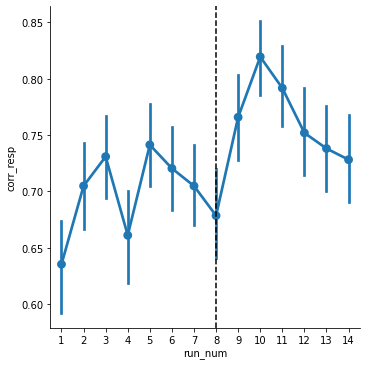

In [16]:
#visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, x='run_num', hue= None)

Plot of accuracy changes over time (by run number). Run number 8 indicates the start of the Behavioral Session 2. 

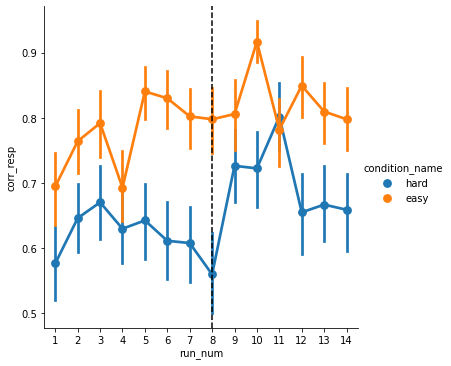

In [17]:
# visualize accuracy across runs by condition_name
vis.plot_acc(dataframe=df_behav, x='run_num', hue= 'condition_name')


Plot of accuracy changes over time (by run number), broken down by condition_name. Run number 8 indicates the start of the Behavioral Session 2. The hard condition reflected overall lower accuracy percentages compared to the easy condition across participants. 

### Consider reaction time/ accuracy tradeoff

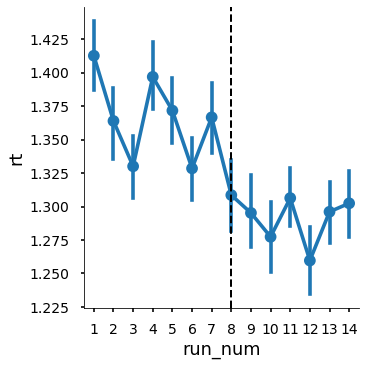

In [31]:
# visualize rt across runs by label
vis.plot_rt(dataframe=df_behav, x='run_num', hue= None)

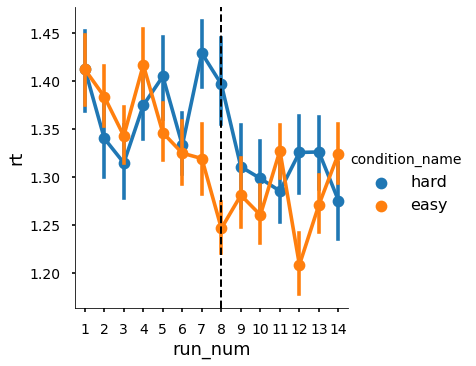

In [32]:
# visualize rt across runs by condition_name
vis.plot_rt(dataframe=df_behav, x='run_num', hue='condition_name')

# 2. How can we explain social prediction learning with "social" behavioral data features vs. "neural correlates"(eye-tracking metrics)? 


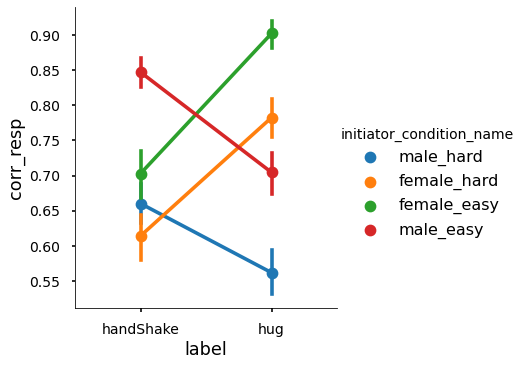

In [22]:
vis.plot_acc(dataframe=df_behav, x='label', hue= 'initiator_condition_name')
#initiator and gender bias for prediction accuracy
#initiator and fixation- do participates fixate more/ less depending on the initiator in the video 
#can also just plot without x= run_num, then statistical tests for sig. diff between condition and label 

In [ ]:
vis.plot_acc(dataframe=df_behav, x='label', hue= 'initiator_condition_name')

When comparing accuracy and label broken down by initiator and condition name, participants were least accurate in making predictions for the hug label when males initiated in the hard condition, and most accurate when making predictions for the hug label when females initiated in the easy condition.

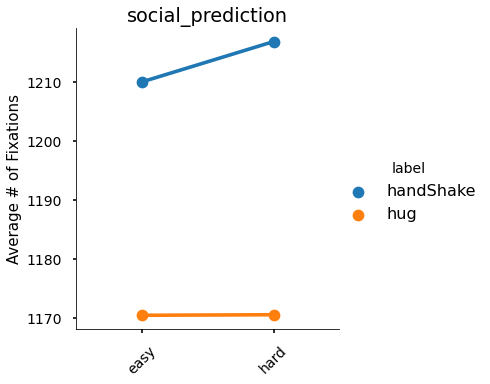

In [30]:
# plot fixation count vs. condition name, separated by label
#not able to add "hue" criteria for these visuals
vis.plot_fixation_count(dataframe=df_merged, x='condition_name', hue= "label")

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator_condition_name")
#more fixations and saccades for male initiators for this specific video type
#what does this say about prediction accuracy?
#is there a gendered effect in terms of eye-movements, accuracy,etc? 
#breakdown of individual participant results- are there fixation patterns that differ within individuals (male vs. female participants? how does this breakdown in terms of the initiator )

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='condition_name', hue= "label")

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


In [ ]:
vis.plot_rt(dataframe=df_behav, x='label', hue= 'initiator')


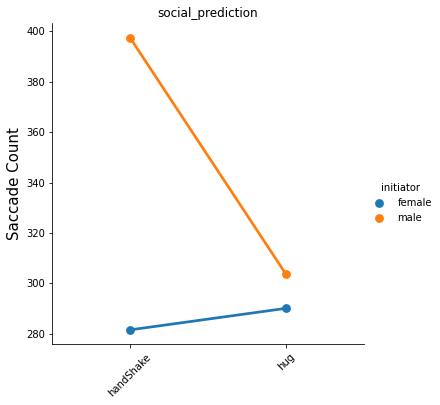

In [8]:
vis.plot_saccade_count(dataframe=df_merged, x='label', hue= 'initiator')

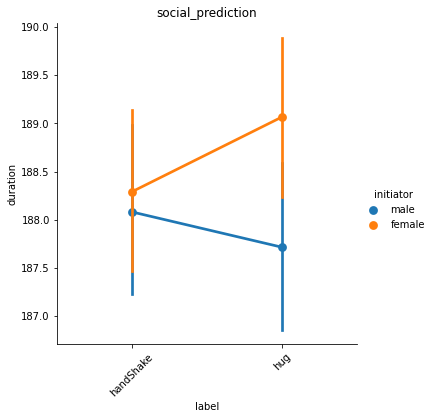

In [9]:
vis.plot_fixation_duration(dataframe=df_merged, x= 'label', hue = 'initiator')


In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label')

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')
#think about confounds as well- 500 ms fixation cross before video onset

In [ ]:
# plot saccade count
vis.plot_saccade_count(dataframe=df_merged, x='label', hue= 'initiator')

In [ ]:
# plot fixation duration
vis.plot_fixation_duration(dataframe=df_merged, x='run_num')

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x= 'label', hue = 'initiator')
#interesting, check on duration timescale and significance

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


In [ ]:
#plot duration vs. duration by label
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "label")

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "condition_name")

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "actors")

In [ ]:
# plot amplitude
vis.plot_amplitude(dataframe=df_merged, x='run_num', hue= 'condition_name')

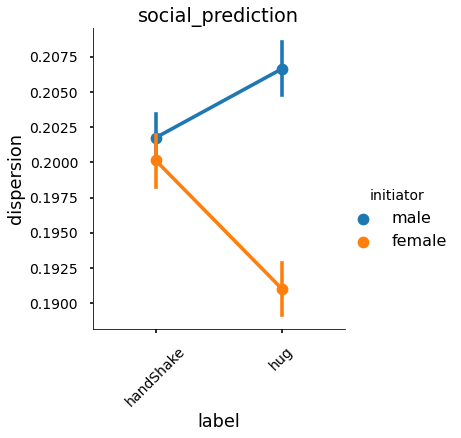

In [31]:
# plot dispersion
#dispersion vs. actors
vis.plot_dispersion(dataframe=df_merged, x='label', hue= 'initiator')

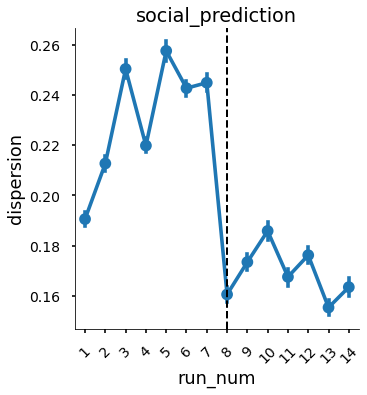

In [35]:
vis.plot_dispersion(dataframe=df_merged, x='run_num')
#ignore dispersion for now- look into finding a model participant to check eyetracking metrics with 

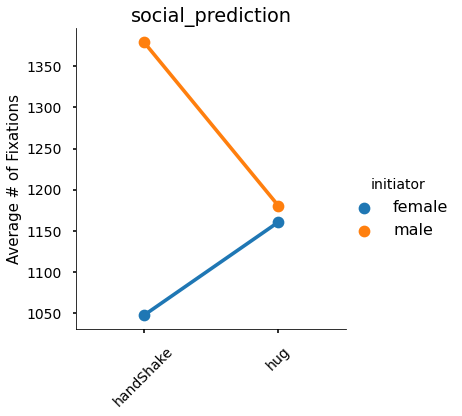

In [32]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


### Eyetracking Metrics- Dispersion plots

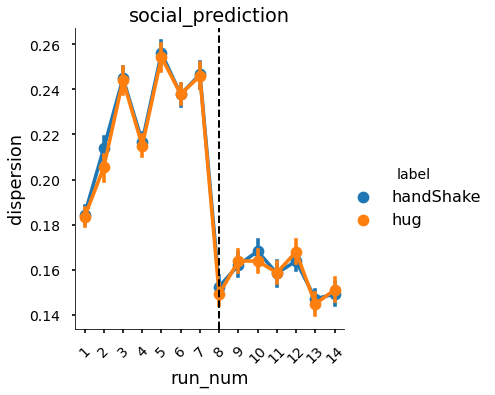

In [98]:
#plot dispersion
#dispersion vs. label
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'label')

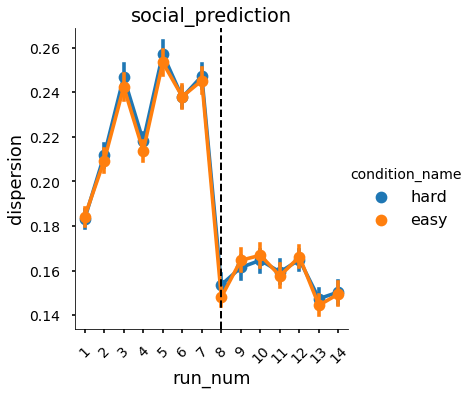

In [95]:
# plot dispersion
#dispersion vs. condition_name
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'condition_name')


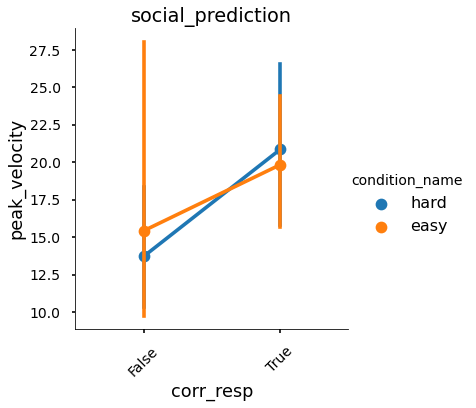

In [103]:
#Relationship between peak_velocity, condition_name, and accuracy

vis.plot_peak_velocity(dataframe=df_merged, x= 'corr_resp', hue= 'condition_name')